<a href="https://colab.research.google.com/github/Saimadeveloper/Tweet-Sentiment-Analysis/blob/main/Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


# Read the CSV file

import pandas as pd

df = pd.read_csv("Tweets Sentiment Analysis.csv", nrows=10000, on_bad_lines="skip")
print(df.info())


print(df.info())

print(df.head())  # Display first 5 rows


# Display the first few rows
print(df.head())

# Print column names
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                               --------------  ----- 
 0   0                                                                                                                    10000 non-null  int64 
 1   1467810369                                                                                                           10000 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         10000 non-null  object
 3   NO_QUERY                                                                                                             10000 non-null  object
 4   _TheSpecialOne_   

In [3]:

df.columns = df.columns.str.strip()  # Remove spaces

# Print column names for verification
print(df.columns)

# Fix column name reference
if 'Tweets Sentiment Analysis' in df.columns:
    print(df['Tweets Sentiment Analysis'].value_counts())
else:
    print("Column name is incorrect. Check the CSV file for the exact column name.")


Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')
Column name is incorrect. Check the CSV file for the exact column name.


In [4]:
#TF-IDF Vectorization
print(df.columns)  # This will display all the column names


Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')


In [5]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
print(df.columns)  # Verify the column names again


Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')


In [6]:
for col in df.columns:
    if 'tweet' in col.lower():  # Check for any column containing 'tweet'
        print(f"Found column: {col}")


In [7]:

# Check column names to find the correct one
print(df.columns)



Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')


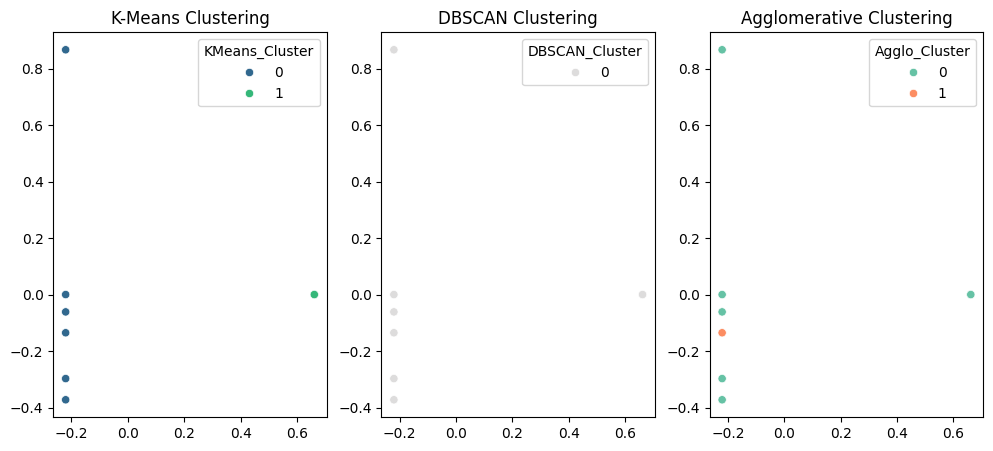

                                          text  KMeans_Cluster  \
0           I love this product! It's amazing!               0   
1  This is the worst thing I have ever bought.               0   
2      Absolutely fantastic! Highly recommend.               0   
3      Not worth the money. Very disappointed.               0   
4            Best purchase I've made recently!               0   
5        Terrible quality, never buying again.               1   
6        Super happy with this, great quality!               1   
7            So bad, I regret purchasing this.               0   

   DBSCAN_Cluster  Agglo_Cluster  
0               0              0  
1               0              0  
2               0              0  
3               0              0  
4               0              0  
5               0              0  
6               0              0  
7               0              1  


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA

# Sample dataset (Replace this with your own dataset)
data = {
    'text': [
        "I love this product! It's amazing!",
        "This is the worst thing I have ever bought.",
        "Absolutely fantastic! Highly recommend.",
        "Not worth the money. Very disappointed.",
        "Best purchase I've made recently!",
        "Terrible quality, never buying again.",
        "Super happy with this, great quality!",
        "So bad, I regret purchasing this."
    ]
}

df = pd.DataFrame(data)

# 🔹 Step 1: Vectorize Text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

# 🔹 Step 2: Apply Clustering Algorithms

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.2, min_samples=2, metric='cosine')
df['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, metric='cosine', linkage='average')
df['Agglo_Cluster'] = agglo.fit_predict(X.toarray())

# 🔹 Step 3: Visualize Clusters using PCA (For 2D Plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(12, 5))

# Plot K-Means Clusters
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')

# Plot DBSCAN Clusters
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['DBSCAN_Cluster'], palette='coolwarm')
plt.title('DBSCAN Clustering')

# Plot Agglomerative Clustering
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Agglo_Cluster'], palette='Set2')
plt.title('Agglomerative Clustering')

plt.show()

# Display Clusters
print(df)



In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Preprocess text (remove non-alphabetic characters and lowercasing)
df['clean_text'] = df['text'].str.replace(r'[^a-z\s]', '', regex=True).str.lower()

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(df['clean_text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}:")
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]))
    print("\n")



Topic 1:
recommend buying errible purchasing bad regret bought worst thing quality


Topic 2:
thing bought worst quality buying errible amazing love product ts


Topic 3:
thing great happy uper ery ot money disappointed worth quality


Topic 4:
worst thing bad regret purchasing quality est recently purchase ve


Topic 5:
worst bought thing purchasing bad regret ighly bsolutely fantastic recommend




In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np


df['text'] = df['text'].astype(str)

# Step 2: Preprocess the text (you can skip this step if already preprocessed)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Step 4: Train K-Means clustering model
num_clusters = 3  # You can change the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Step 5: Analyze the top terms for each cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Print the top 10 terms for each cluster
for i in range(num_clusters):
    print(f"Cluster {i + 1}:")
    print(", ".join([terms[ind] for ind in order_centroids[i, :10]]))
    print()

# Step 6: Manually map clusters to sentiments
# Based on the top terms, you can manually map the clusters to sentiments.
# Example: You can map Cluster 0 -> Positive, Cluster 1 -> Negative, Cluster 2 -> Neutral, etc.
df['sentiment'] = df['cluster'].map({
    0: 'Positive',   # Example mapping based on top words
    1: 'Negative',   # Example mapping based on top words
    2: 'Neutral'     # Example mapping based on top words
})

# Display the dataframe with sentiment labels
print(df[['text', 'sentiment']].head())



Cluster 1:
purchasing, great, ery, amazing, ts, regret, recently, thing, recommend, uper

Cluster 2:
product, recommend, disappointed, ts, quality, uper, ighly, errible, ot, regret

Cluster 3:
happy, love, bad, thing, recommend, recently, quality, regret, uper, ts

                                          text sentiment
0           I love this product! It's amazing!   Neutral
1  This is the worst thing I have ever bought.  Negative
2      Absolutely fantastic! Highly recommend.  Positive
3      Not worth the money. Very disappointed.  Negative
4            Best purchase I've made recently!  Negative


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Step 5: Predict the clusters for each tweet
df['predicted_cluster'] = kmeans.predict(X)

# Step 6: Map clusters to sentiments manually based on previous interpretation
# You should have previously mapped clusters based on top words or other observations.
# Example cluster mapping:
sentiment_mapping = {
    0: 'Positive',
    1: 'Negative',
    2: 'Neutral'
}

# Assign sentiment labels based on the predicted cluster
df['predicted_sentiment'] = df['predicted_cluster'].map(sentiment_mapping)

# Step 7: Display the results with sentiment labels
print(df[['text', 'predicted_sentiment']].head())


                                          text predicted_sentiment
0           I love this product! It's amazing!             Neutral
1  This is the worst thing I have ever bought.            Negative
2      Absolutely fantastic! Highly recommend.            Positive
3      Not worth the money. Very disappointed.            Negative
4            Best purchase I've made recently!            Negative
